In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [105]:
import glob
import errno

def get_log_time(path):
    path = path.split("/")[-1]
    timestamp = path.split("_")[1]
    hour = timestamp.split("-")[0]
    return int(hour)

def get_dict(prov):
    path = '/Users/nidhikakulawaram/Downloads/single-datacenter-ftp-test/'+ prov + '/*.txt' #note C:
    files = glob.glob(path)
    latency = {}
    throughput = {}

    for name in files:
        hour = get_log_time(name)
        try:
            with open(name) as f:
                for line in f:
                    if 'Transferred:' in line: 
                        latency.setdefault(hour,[]).append(line.split()[7])
                    if 'Bytes per second:' in line:
                        throughput.setdefault(hour,[]).append(line.split()[6])
        except IOError as exc: #Not sure what error this is
            if exc.errno != errno.EISDIR:
                raise
    for t in latency.keys():
        latency[t] = latency[t][:10]
        throughput[t] = throughput[t][:10]
    return latency, throughput


In [106]:
def create_ping_scatter_plot(latencies_dict, cloud_provider, is_wan=False):
#     if is_wan:
#         for i in range(1,8):
#             y = latencies_dict[i]
#             plt.scatter([i] * len(y), y)
#         plt.xlabel("Hour of Day (CST)")
#         plt.title("{} WAN Ping Test".format(cloud_provider))
#         plt.xticks(range(1, 8, 1))
#     else:
    for xe, ye in zip(latencies_dict.keys(), latencies_dict.values()):
        plt.scatter([xe] * len(ye), ye, alpha = 0.5)
        plt.xlabel("Hour of Day (PST)")
        plt.title("{} Single D.C. Ping Test".format(cloud_provider))
        plt.xticks(range(0, 24, 1))
    #plt.yticks(np.arange(0, 1,0.1))
    plt.ylabel("Latency (ms)")
    plt.show()
    return

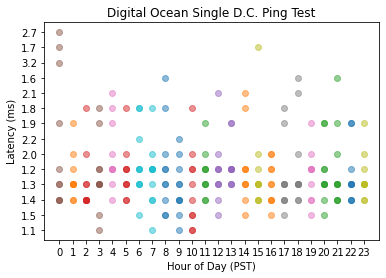

In [107]:
do_latency, do_throughput  = get_dict('digital-ocean')
create_ping_scatter_plot(do_latency, 'Digital Ocean')

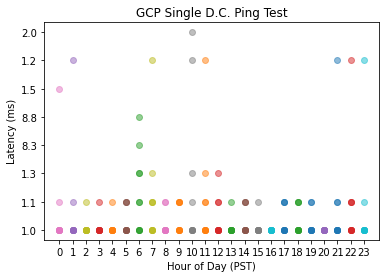

In [108]:
gcp_latency, gcp_throughput  = get_dict('gcp')
create_ping_scatter_plot(gcp_latency, 'GCP')

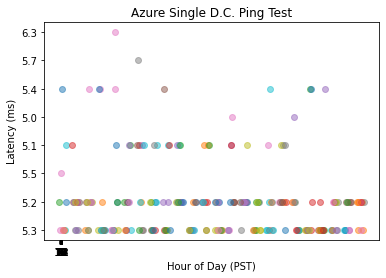

{2212: ['5.3'],
 2306: ['5.3'],
 824: ['5.3'],
 930: ['5.2'],
 1242: ['5.3'],
 106: ['5.2'],
 12: ['5.5'],
 1542: ['5.2'],
 1918: ['5.3'],
 1600: ['5.3'],
 742: ['5.2'],
 200: ['5.3'],
 706: ['5.2'],
 612: ['5.1'],
 1848: ['5.3'],
 2000: ['5.3'],
 1312: ['5.3'],
 142: ['5.3'],
 1206: ['5.3'],
 1412: ['5.2'],
 1506: ['5.3'],
 2342: ['5.2'],
 1854: ['5.3'],
 1836: ['5.3'],
 1818: ['5.0'],
 642: ['5.3'],
 1700: ['5.2'],
 1000: ['5.3'],
 830: ['5.3'],
 924: ['5.1'],
 2206: ['5.3'],
 2312: ['5.2'],
 500: ['5.2'],
 1442: ['5.2'],
 112: ['5.2'],
 1342: ['5.2'],
 6: ['5.3'],
 1406: ['5.3'],
 1512: ['5.3'],
 42: ['5.3'],
 1306: ['5.3'],
 1212: ['5.2'],
 1936: ['5.4'],
 1954: ['5.2'],
 2242: ['5.3'],
 712: ['5.3'],
 400: ['5.3'],
 606: ['5.7'],
 300: ['5.3'],
 2100: ['5.3'],
 1948: ['5.4'],
 2318: ['5.2'],
 2130: ['5.2'],
 2024: ['5.3'],
 636: ['5.1'],
 1348: ['5.2'],
 430: ['5.4', '6.3'],
 118: ['5.3'],
 224: ['5.3'],
 654: ['5.1'],
 1448: ['5.2'],
 330: ['5.2'],
 1812: ['5.2'],
 1906: ['5.3'],

In [113]:
az_latency, az_throughput  = get_dict('azure')
create_ping_scatter_plot(az_latency, 'Azure')
az_latency

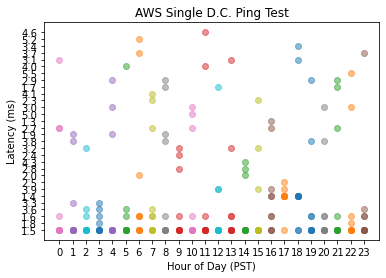

In [112]:
aws_latency, aws_throughput  = get_dict('AWS_scplogs')
create_ping_scatter_plot(aws_latency, 'AWS')

In [96]:
az_transfer_time = []
for t in transferred:
    lst = t.split()
    az_transfer_time.append(float(lst[7]))
az_transfer_time = az_transfer_time[:240]

In [97]:
path = '/Users/nidhikakulawaram/Downloads/single-datacenter-ftp-test/digital-ocean/*.txt' #note C:
files = glob.glob(path)
print(len(files))

transferred = []
bps = []

for name in files:
    try:
        with open(name) as f:
            for line in f:
                if 'Transferred:' in line: 
                    transferred.append(line)
                if 'Bytes per second:' in line:
                    bps.append(line)
    except IOError as exc: #Not sure what error this is
        if exc.errno != errno.EISDIR:
            raise

240


In [98]:
do_transfer_time = []
for t in transferred:
    lst = t.split()
    do_transfer_time.append(float(lst[7]))
do_transfer_time = do_transfer_time[:240]
do_transfer_time[0:5]

[1.1, 1.3, 1.3, 1.3, 1.3]

In [99]:
path = '/Users/nidhikakulawaram/Downloads/single-datacenter-ftp-test/AWS_scplogs/*.txt' #note C:
files = glob.glob(path)
print(len(files))

transferred = []
bps = []

for name in files:
    try:
        with open(name) as f:
            for line in f:
                if 'Transferred:' in line: 
                    transferred.append(line)
                if 'Bytes per second:' in line:
                    bps.append(line)
    except IOError as exc: #Not sure what error this is
        if exc.errno != errno.EISDIR:
            raise

242


In [100]:
aws_transfer_time = []
for t in transferred:
    lst = t.split()
    aws_transfer_time.append(float(lst[7]))
aws_transfer_time = aws_transfer_time[:240]
aws_transfer_time[0:5]

[1.5, 1.4, 1.5, 1.5, 1.5]

In [ ]:
# Helper functions

# takes in a file path to the log file and return ([list of latencies], packet loss in %)
def scrap_ping_log(path):
    f = open(path).readlines()
    latencies = []
    packet_loss = 0
    # assuming the file is non empty.
    for l in f:
        if len(l) > 10 and l[0:2] == '64':
            time_idx = l.find("time=")
            latency = float(l[time_idx+5:-3])
            latencies.append(latency)
        elif len(l) > 10 and l[0:3] == '500':
            loss_line = l.split(",")[2].strip()
            percent_idx = loss_line.find("%")
            packet_loss = float(loss_line[:percent_idx])
            break
    return (latencies, packet_loss)

# takes in a file path to the log file and returns an integer between 0 and 24 representing the time of test (UTC).
def get_log_time(path):
    path = path.split("/")[-1]
    timestamp = path.split("_")[1]
    hour = timestamp.split("-")[0]
    return int(hour)

# takes in a list of file paths to all the logs for a particular cloud provider and return 
# (ping_latencies, ping_losses)
# where ping_latencies is dictionary: 
# key = hour, value = list of 500 ping latencies for that hour
# and ping_losses is dictionary:
# key = hour, value = % loss for that hour
def create_data_dicts(log_paths):
    ping_latencies = {}
    ping_losses = {}
    for i in log_paths:
        hour = get_log_time(i)
        data = scrap_ping_log(i)
        ping_latencies[hour] = data[0]
        ping_losses[hour] = data[1]
    return (ping_latencies, ping_losses)

# takes in a dictionary (idx 0 of tuple returned by create_data_dicts)) and plots a scatterplot of latencies vs hour
def create_ping_scatter_plot(latencies_dict, cloud_provider, is_wan=False):
    if is_wan:
        for i in range(1,8):
            y = latencies_dict[i]
            plt.scatter([i] * len(y), y)
        plt.xlabel("Hour of Day (CST)")
        plt.title("{} WAN Ping Test".format(cloud_provider))
        plt.xticks(range(1, 8, 1))
    else:
        for xe, ye in zip(latencies_dict.keys(), latencies_dict.values()):
            plt.scatter([xe] * len(ye), ye)
        plt.xlabel("Hour of Day (PST)")
        plt.title("{} Single D.C. Ping Test".format(cloud_provider))
        plt.xticks(range(0, 24, 1))
    #plt.yticks(np.arange(0, 1,0.1))
    plt.ylabel("Latency (ms)")
    plt.show()
    return

def create_avg_and_std_line_plots(latencies_dict, cloud_provider, is_wan=False):
    if is_wan:
        plt.plot(range(1, 8, 1), [np.mean(latencies_dict[i]) for i in range(1, 8)], label="avg latency")
        plt.plot(range(1, 8, 1), [np.std(latencies_dict[i]) for i in range(1, 8)], label="std dev")
        plt.xlabel("Hour of Day (CST)")
        plt.xticks(range(0, 8, 1))
        plt.title("{} WAN Ping Test".format(cloud_provider))
    else:
        plt.plot(range(24), [np.mean(latencies_dict[i]) for i in range(24)], label="avg latency")
        plt.plot(range(24), [np.std(latencies_dict[i]) for i in range(24)], label="std dev")
        plt.xlabel("Hour of Day (UTC)")
        plt.xticks(range(0, 24, 1))
        plt.title("{} Single D.C. Ping Test".format(cloud_provider))
    plt.ylabel("Avg Latency / Std Dev (ms)")
    
    plt.legend()
    plt.show()
        

AttributeError: 'list' object has no attribute 'mean'

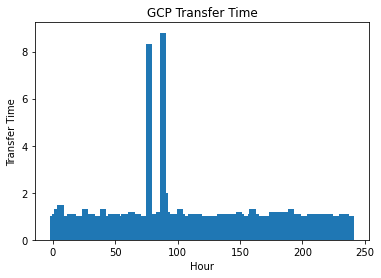

In [109]:

plt.bar(range(0,240),gcp_transfer_time,5)
plt.xlabel('Hour')
plt.ylabel('Transfer Time')
plt.title('GCP Transfer Time')

#throughput vs time 
#bytes/transfer time
#plot bytes per second recieved

Text(0.5, 1.0, 'Azure Transfer Time')

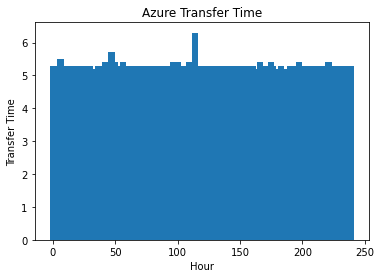

In [102]:
plt.bar(range(0,240),az_transfer_time,5)
plt.xlabel('Hour')
plt.ylabel('Transfer Time')
plt.title('Azure Transfer Time')

Text(0.5, 1.0, 'AWS Transfer Time')

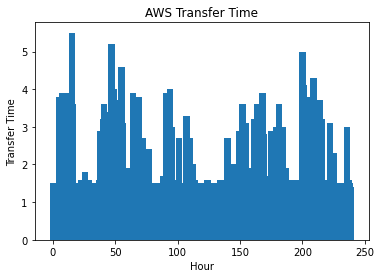

In [103]:
plt.bar(range(0,240),aws_transfer_time,5)
plt.xlabel('Hour')
plt.ylabel('Transfer Time')
plt.title('AWS Transfer Time')

Text(0.5, 1.0, 'Digital Ocean Transfer Time')

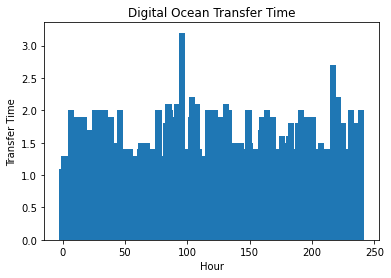

In [104]:
plt.bar(range(0,240),do_transfer_time,5)
plt.xlabel('Hour')
plt.ylabel('Transfer Time')
plt.title('Digital Ocean Transfer Time')

DescribeResult(nobs=240, minmax=(1.0, 8.8), mean=1.1004166666666666, variance=0.4778659344490936, skewness=10.538722321976419, kurtosis=111.11327232618335)


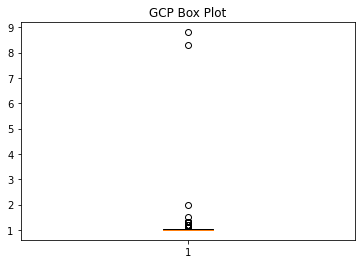

In [105]:
from scipy import stats
fig1, ax1 = plt.subplots()
ax1.set_title('GCP Box Plot')
ax1.boxplot(gcp_transfer_time)
print(stats.describe(gcp_transfer_time))

DescribeResult(nobs=240, minmax=(5.0, 6.3), mean=5.247083333333334, variance=0.011706938633193864, skewness=3.9878278162666754, kurtosis=36.90345033290095)


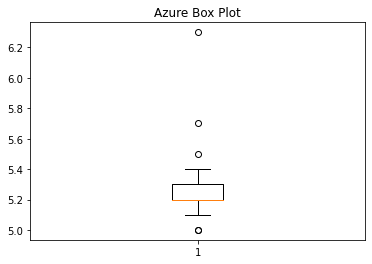

In [106]:

fig1, ax1 = plt.subplots()
ax1.set_title('Azure Box Plot')
ax1.boxplot(az_transfer_time)
print(stats.describe(az_transfer_time))

DescribeResult(nobs=240, minmax=(1.3, 5.5), mean=1.9454166666666666, variance=0.7352927126917711, skewness=1.8648230463746007, kurtosis=2.582462518947244)


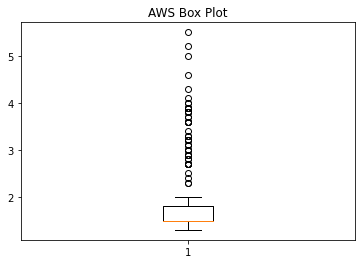

In [107]:

fig1, ax1 = plt.subplots()
ax1.set_title('AWS Box Plot')
ax1.boxplot(aws_transfer_time)
print(stats.describe(aws_transfer_time))

DescribeResult(nobs=240, minmax=(1.1, 3.2), mean=1.4579166666666665, variance=0.09416300557880056, skewness=1.773227333273958, kurtosis=4.304947269713784)


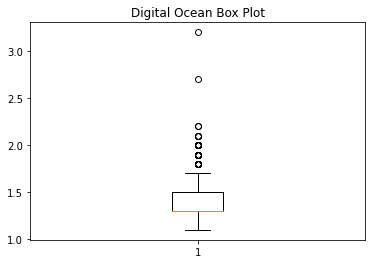

In [108]:
fig1, ax1 = plt.subplots()
ax1.set_title('Digital Ocean Box Plot')
ax1.boxplot(do_transfer_time)
print(stats.describe(do_transfer_time))